<h2>German Traffic Signs Detection </h2>

The German Traffic Sign Detection Benchmark is an object
detection problem where the task at hand is to detect traffic signs.
Traffic sign detection is still a challenging real-world problem of high
industrial relevance.Participating algorithms need to pinpoint the
location of given categories of traffic signs (prohibitory, mandatory or
danger)

The Dataset Information is as follows :
A single-image detection problem

● 900 Images (divided in 600 training images and 300 evaluation
images)

● Division into four categories that suit the properties of various
detection approaches with different properties

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

<h2>Data-Set Acquisition </h2>

http://benchmark.ini.rub.de/?section=gtsdb&subsection=about

<h2> Dataset Format </h2>

<h3>Image Format  </h3>

- The images contain zero to six traffic signs. However, even if there is a traffic sign located in the image it may not belong to the competition relevant categories (prohibitive, danger, mandatory).
- Images are stored in PPM format
- The sizes of the traffic signs in the images vary from 16x16 to 128x128
- Traffic signs may appear in every perspective and under every lighting condition

<h3>Anottation Format </h3>

- Annotations are provided in CSV files. Fields are seperated by a semicolon (;). They contain the following information:

    - Filename: Filename of the image the annotations apply for
    - Traffic sign's region of interest (ROI) in the image
    - Leftmost image column of the ROI
    - Upmost image row of the ROI
    - Rightmost image column of the ROI
    - Downmost image row of the ROI
    - ID providing the traffic sign's class

<h2>Task of the Problem </h2>

<b>
    
- Our model should predict whether a given image belongs to any of the four classes namely "Prohibitory" , "Danger", "Mandatory" and "Other"
- There are 42 classes of traffic signs out of which they are grouped under 4 classes as mentioned above
    
</b>

In [4]:
signnames=pd.read_csv("E:\\GTSDB\\signnames.csv")
signnames

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


<h2>EDA And Loading the Dataset </h2>

<h2>Let us visualize every traffic sign and It's meaning </h2>

In [ ]:
#https://www.delftstack.com/howto/matplotlib/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/
width=5
height=5
rows = 2
cols = 2
axes=[]
fig=plt.figure()

for a in range(rows*cols):
    b = np.random.randint(7, size=(height,width))
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()

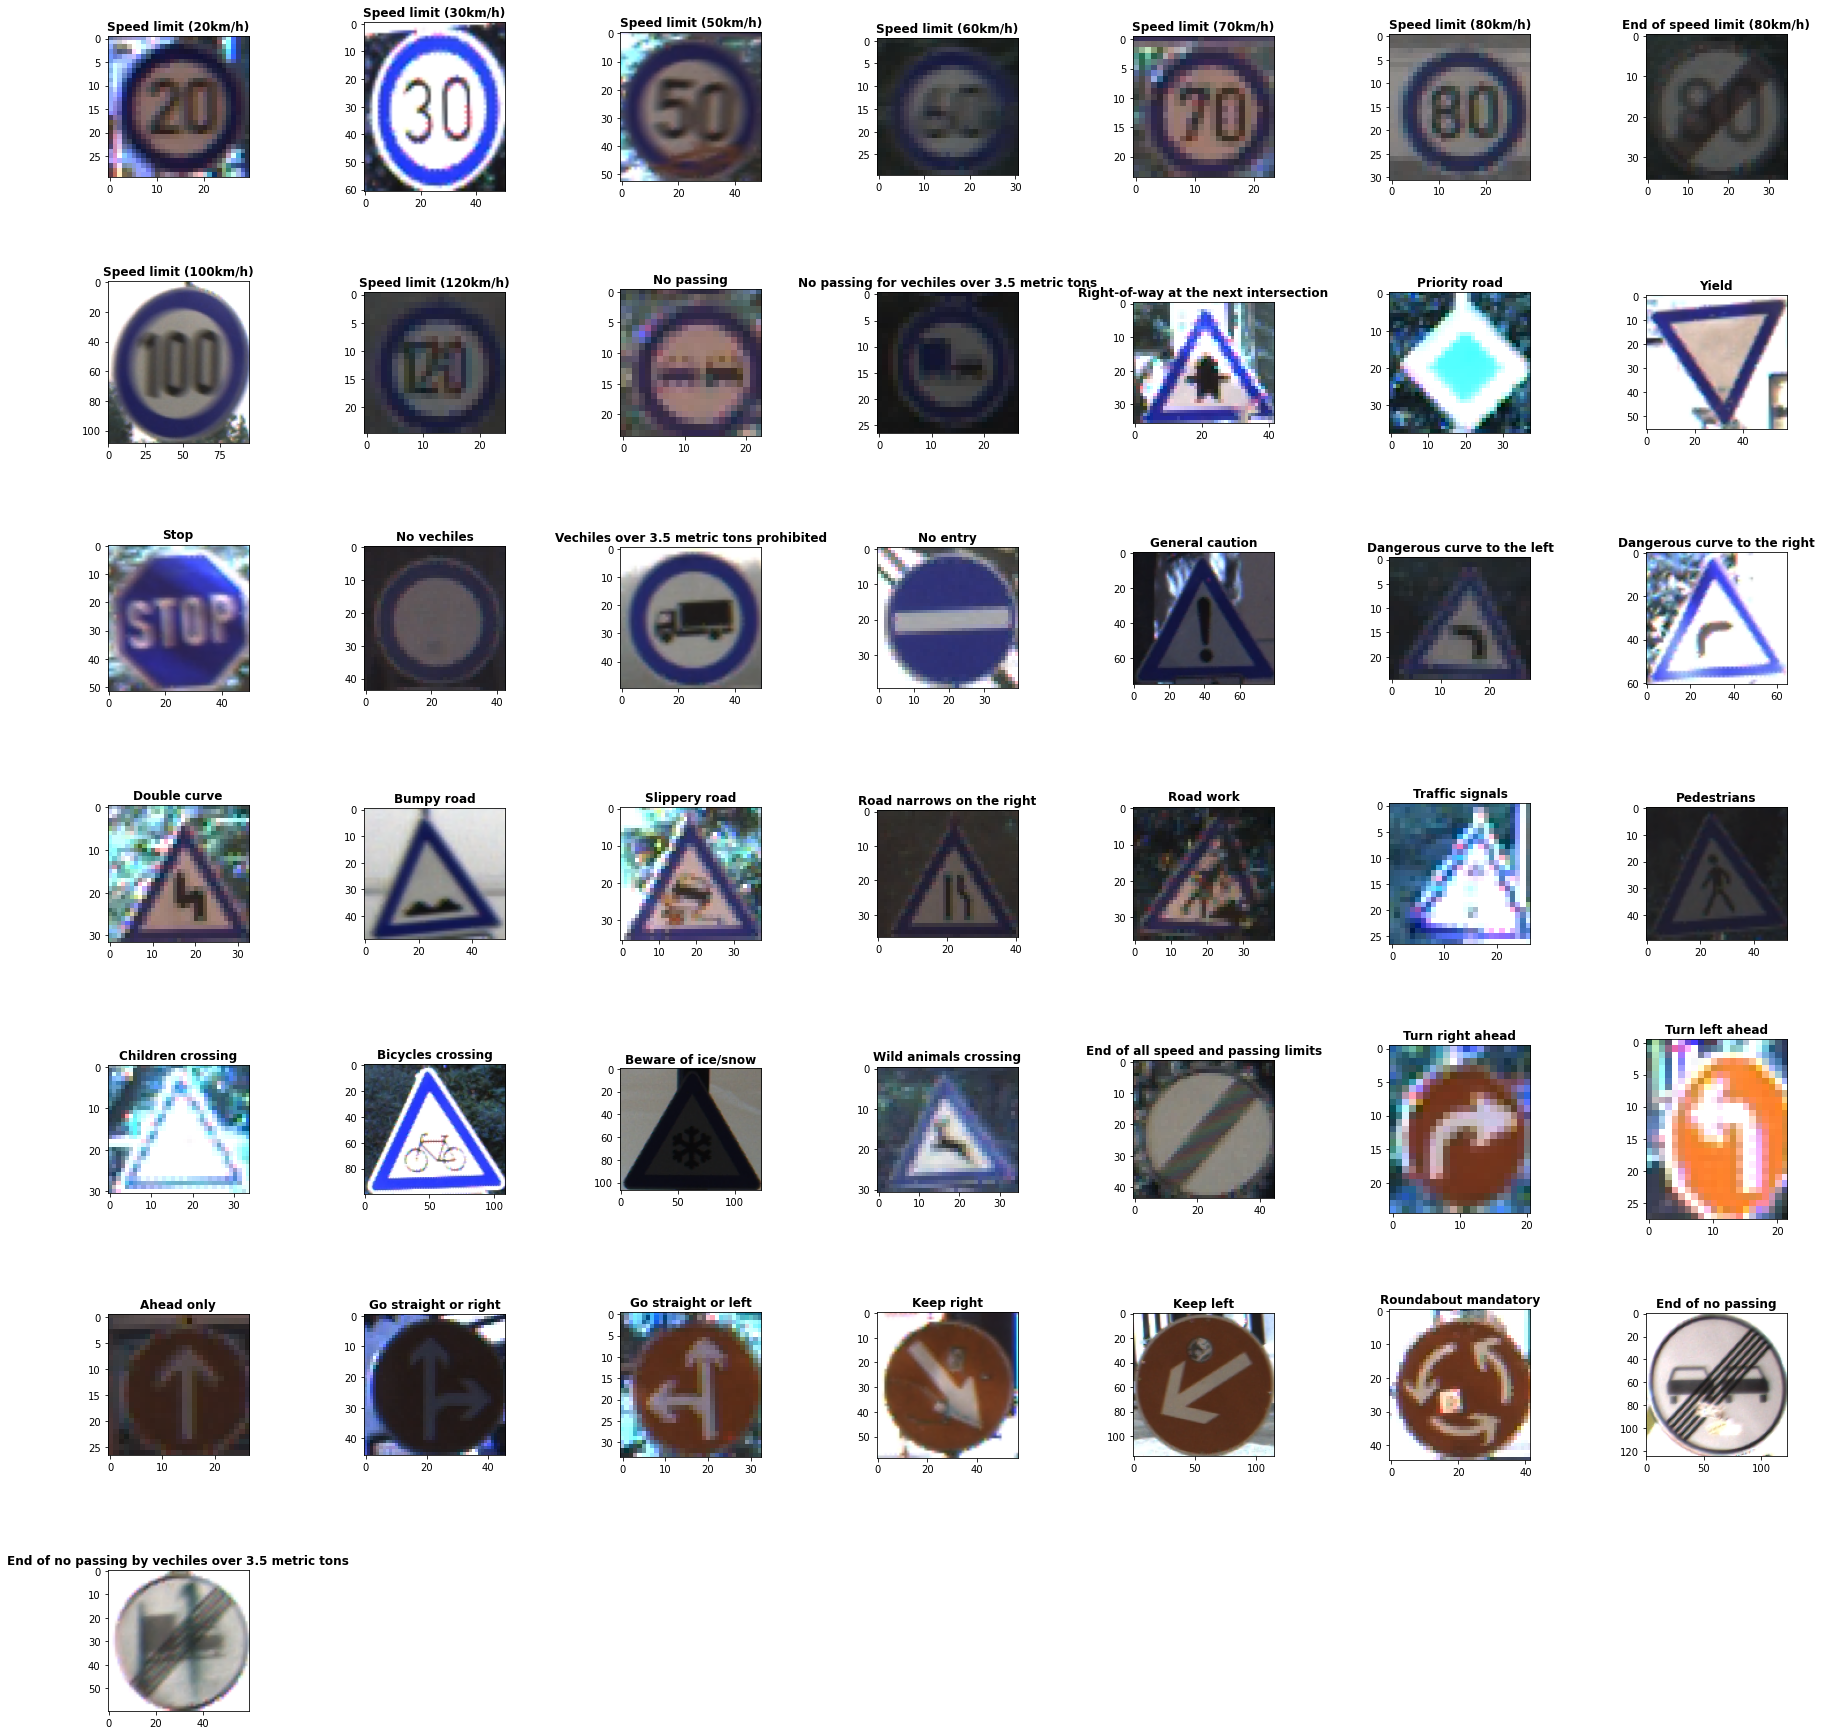

In [20]:
rows = 7
cols = 7
width=15
height=15
fig=plt.figure(figsize=(25,25))
axes=[]
dict_={'fontweight':"bold"}
for i in range(0,43):
    val=str(format(i,'02d'))
    path="E:\\GTSDB\\TrainIJCNN2013\\" + val + "\\00000.ppm"
    img=cv2.imread(path)
    img=img.astype('float32')
    img=img/255.
    axes.append(fig.add_subplot(rows, cols, i+1) )
    subplot_title=(signnames['SignName'][i])
    axes[-1].set_title(subplot_title,fontdict=dict_)  
    plt.imshow(img)
    
fig.tight_layout()
plt.show()

<h2>Let us Check One Image Pertaining to each of the four Classes </h2>

- From the text file given along with the dataset,it clearly mentions the signs that belong to each of the four above mentioned
  classes.So let's segregate the traffic signs into the four classes 

<b>
0 = speed limit 20 (prohibitory)
    
1 = speed limit 30 (prohibitory)
    
2 = speed limit 50 (prohibitory)
    
3 = speed limit 60 (prohibitory)
    
4 = speed limit 70 (prohibitory)
    
5 = speed limit 80 (prohibitory)
    
6 = restriction ends 80 (other)
    
7 = speed limit 100 (prohibitory)
    
8 = speed limit 120 (prohibitory)
    
9 = no overtaking (prohibitory)
    
10 = no overtaking (trucks) (prohibitory)
    
11 = priority at next intersection (danger)
    
12 = priority road (other)
    
13 = give way (other)
    
14 = stop (other)
    
15 = no traffic both ways (prohibitory)
    
16 = no trucks (prohibitory)
    
17 = no entry (other)
    
18 = danger (danger)
    
19 = bend left (danger)
    
20 = bend right (danger)
    
21 = bend (danger)
    
22 = uneven road (danger)
    
23 = slippery road (danger)
    
24 = road narrows (danger)
    
25 = construction (danger)
    
26 = traffic signal (danger)
    
27 = pedestrian crossing (danger)
   
28 = school crossing (danger)
    
29 = cycles crossing (danger)
    
30 = snow (danger)
    
31 = animals (danger)
    
32 = restriction ends (other)
    
33 = go right (mandatory)
    
34 = go left (mandatory)
    
35 = go straight (mandatory)
    
36 = go right or straight (mandatory)
    
37 = go left or straight (mandatory)
    
38 = keep right (mandatory)
    
39 = keep left (mandatory)
    
40 = roundabout (mandatory)
    
41 = restriction ends (overtaking) (other)
    
42 = restriction ends (overtaking (trucks)) (other)
 
<b>

The respective categories consist of the following traffic sign classes:
prohibitory = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 16] (circular, white ground with red border)
mandatory = [33, 34, 35, 36, 37, 38, 39, 40] (circular, blue ground)
 danger = [11, 18, 19, 20 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] (triangular, white ground with red border)


In [5]:
def img_plot(path):
    img=cv2.imread(path)
    img=img.astype('float32')
    img=img/255.
    return img

<h3>Prohibitory </h3>

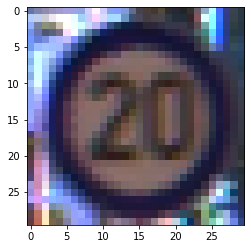

In [10]:
path="E:\\GTSDB\\Traffic Signs\\00\\00000.ppm"
plt.imshow(img_plot(path))

<h3>Danger </h3>

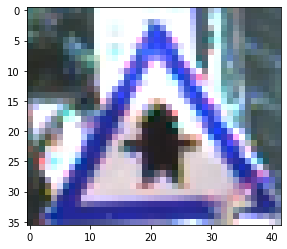

In [22]:
path="E:\\GTSDB\\TrainIJCNN2013\\11\\00000.ppm"
plt.imshow(img_plot(path))

<h3>Mandatory </h3>

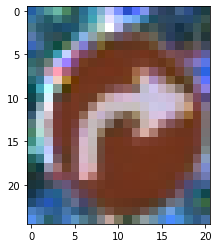

In [23]:
path="E:\\GTSDB\\TrainIJCNN2013\\33\\00000.ppm"
plt.imshow(img_plot(path))

<h3>Others </h3>

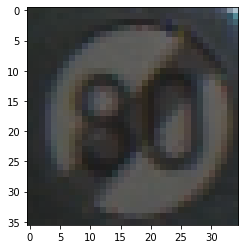

In [24]:
path="E:\\GTSDB\\TrainIJCNN2013\\06\\00001.ppm"
plt.imshow(img_plot(path))

<h2>Let Us Check the Distribution of Class Label Over the Train Data </h2>

In [27]:
filename="E:\\GTSDB\\TrainIJCNN2013\\gt.txt"
import csv
file=dict()
with open(filename) as f:
        reader = csv.reader(f, delimiter=';')
        next(reader) # skip header

        # loop over all images in current annotations file
        for row in reader:
            filename = row[0] # filename is in the 0th column
            label = int(row[5]) # label is in the 7th column
            file[filename]=label

In [30]:
prohibitory = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 16]
mandatory = [33, 34, 35, 36, 37, 38, 39, 40]
danger = [11, 18, 19, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
others =[6,12,13,14,17,32,41,42]

In [36]:
counter={"prohibitory":0,"mandatory":0,"danger":0,"others":0}
for k,v in file.items():
    if v in prohibitory:
        counter["prohibitory"]+=1
    elif v in mandatory:
        counter["mandatory"]+=1
    elif v in danger:
        counter["danger"]+=1
    else:
        counter["others"]+=1
    
    

In [41]:
print(counter.values())

dict_values([234, 76, 88, 107])


<BarContainer object of 4 artists>

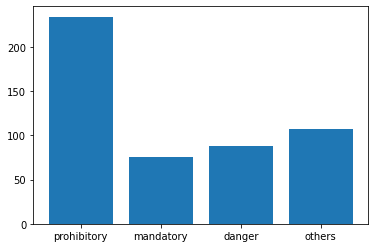

In [52]:
plt.bar(counter.keys(),counter.values())

<b>

- As we can see from the above plot,prohibitory class has highest number of image data.Other 3 classes doesn't differ much

</b>